In [1]:
import urllib
import xml.etree.ElementTree as ET

In [2]:
all_game_directories = []

days = range(1, 32)
months = range(4, 12)
years = range(2014, 2019)

for year in years:
    for month in months:
        for day in days:
            games_for_day_string = "http://gd2.mlb.com/components/game/mlb/year_{}/month_{:02d}/day_{:02d}/miniscoreboard.xml".format(year, month, day)
            try:
                response = urllib.request.urlopen(games_for_day_string)
                games = ET.fromstring(response.read())
                for game in games:
                    all_game_directories.append(game.get('game_data_directory'))
            except urllib.error.HTTPError as e:
                pass       


In [3]:
game_scoreboards = []

for game_dir in all_game_directories:
    game_dir_str = "http://gd2.mlb.com{}/miniscoreboard.xml".format(game_dir)
    try:
        response = urllib.request.urlopen(game_dir_str)

        game = ET.fromstring(response.read())
        
        # just get winning pitcher/ losing pitch info
        post_game = game.find('post_game')
        if post_game:
            winning_pitcher = post_game.find('winning_pitcher')
            losing_pitcher = post_game.find('losing_pitcher')
            game_scoreboards.append((winning_pitcher, losing_pitcher))
    except:
        pass


In [4]:
import numpy as np
def era(ers, ip):
    if ers > 0 and ip == 0:
        return np.inf
    if ers == 0 and ip == 0:
        return 0
    return ers/ip * 9

In [5]:
winning_pitcher_stats = []
losing_pitcher_stats = []

for winning_pitcher, losing_pitcher in game_scoreboards:

    winner_er, winner_ip = float(winning_pitcher.get('er', 0)), float(winning_pitcher.get('ip', 0))
    loser_er, loser_ip = float(losing_pitcher.get('er', 0)), float(losing_pitcher.get('ip', 0))
    
    winning_pitcher_stats.append((winner_er, winner_ip)) 
    losing_pitcher_stats.append((loser_er, loser_ip))

In [6]:
import pandas as pd

winning_pitcher_stats = pd.DataFrame(winning_pitcher_stats, columns=['er', 'ip'])
losing_pitcher_stats = pd.DataFrame(losing_pitcher_stats,  columns=['er', 'ip'])

In [7]:
winning_pitcher_stats['era'] = [era(row['er'], row['ip']) for i, row in winning_pitcher_stats.iterrows()]
losing_pitcher_stats['era'] = [era(row['er'], row['ip']) for i, row in losing_pitcher_stats.iterrows()]

In [8]:
import matplotlib.pyplot as plt

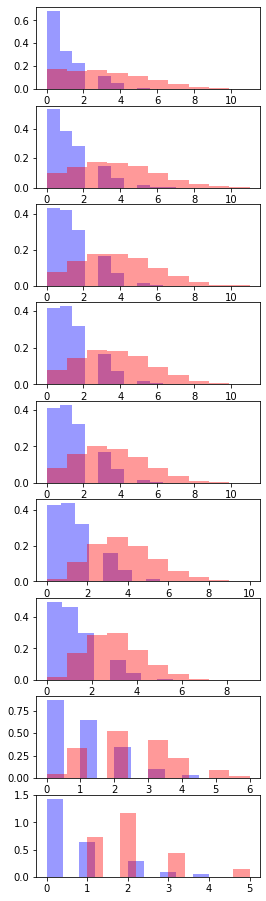

In [15]:
fig, ax = plt.subplots(9, 1, figsize=plt.figaspect(9/1))



for i, ax in enumerate(ax.flatten()):
    
    winning_data = winning_pitcher_stats['er'][winning_pitcher_stats['ip'] > i]
    losing_data = losing_pitcher_stats['er'][losing_pitcher_stats['ip'] > i]
    
    n, bins, winning_patches = ax.hist(winning_data, 10, density=1, alpha=0.4, label="winning", color='blue')
    n, bins, losing_patches = ax.hist(losing_data, 10, density=1, alpha=0.4, label="losing", color='red')

plt.show()

In [10]:
print(losing_pitcher_stats['era'].sort_values())

4655     0.0
265      0.0
3457     0.0
5158     0.0
261      0.0
        ... 
5683     inf
10701    inf
5622     inf
5727     inf
6368     inf
Name: era, Length: 12378, dtype: float64


In [11]:
import math

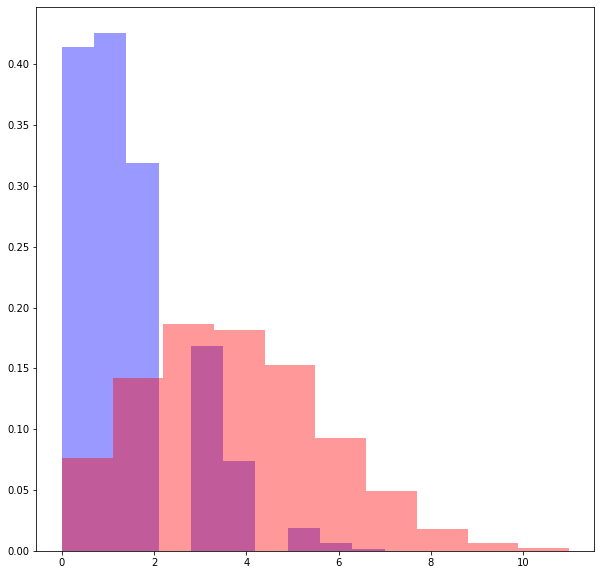

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))


    
winning_data = winning_pitcher_stats['er'][winning_pitcher_stats['ip'] > 3]
losing_data = losing_pitcher_stats['er'][losing_pitcher_stats['ip'] > 3]


n, bins, winning_patches = ax.hist(winning_data, 10, density=1, alpha=0.4, label="winning", color='blue')
n, bins, losing_patches = ax.hist(losing_data, 10, density=1, alpha=0.4, label="losing", color='red')

plt.show()

In [20]:
bins

array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ])